In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

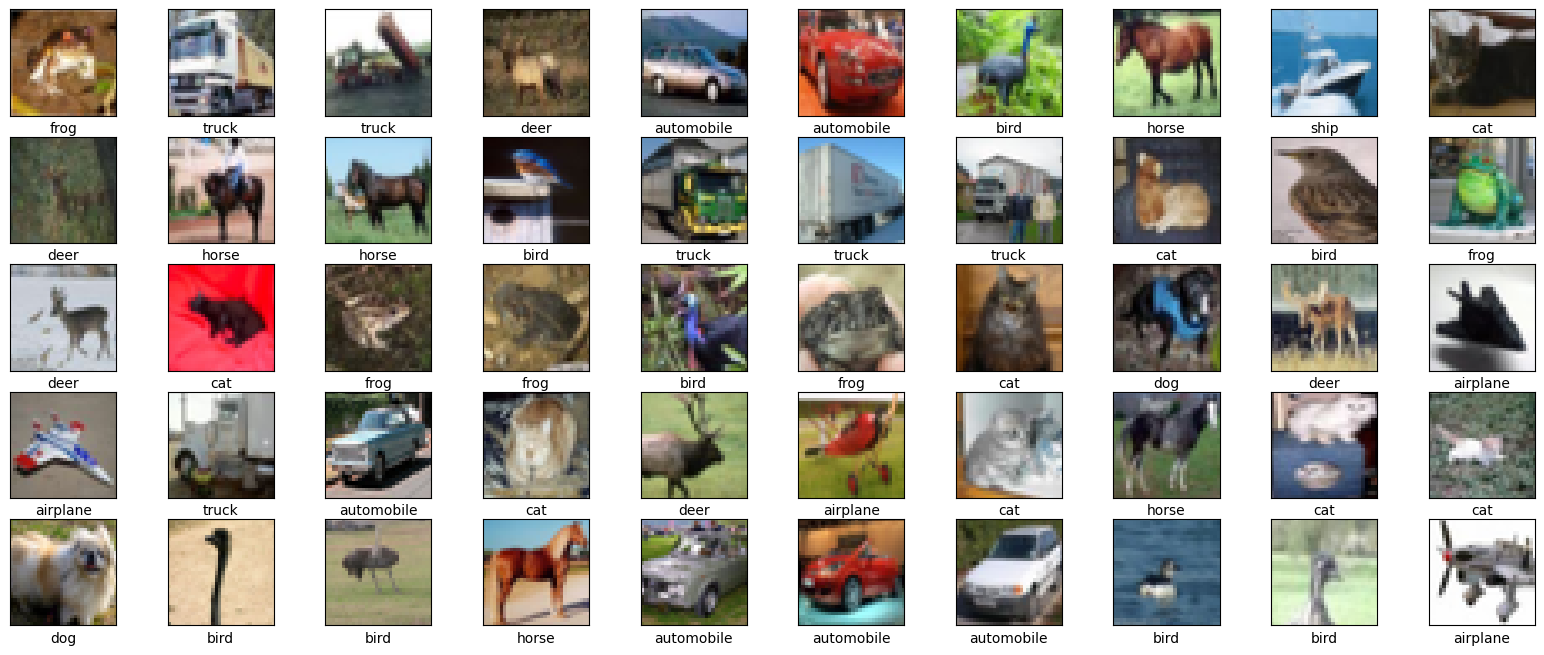

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train_processed, X_test_processed = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                        

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_l1 = keras.Sequential()

# Convolutional Layers
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.2))

model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.3))

model_l1.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.4))

# Fully Connected Layers
model_l1.add(layers.Flatten())
model_l1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Dropout(0.5))
model_l1.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                      

In [9]:
model_l1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_l2 = keras.Sequential()

# Convolutional Layers
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.2))

model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.3))

model_l2.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.4))

# Fully Connected Layers
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Dropout(0.5))
model_l2.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                      

In [11]:
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
epochs = 10

In [13]:
h = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/10
313/313 [==============================] - 22s 24ms/step - loss: 1.9215 - accuracy: 0.3678 - val_loss: 1.5545 - val_accuracy: 0.4494
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 1.3078 - accuracy: 0.5382 - val_loss: 1.0999 - val_accuracy: 0.6102
Epoch 3/10
313/313 [==============================] - 6s 20ms/step - loss: 1.0426 - accuracy: 0.6297 - val_loss: 0.9973 - val_accuracy: 0.6512
Epoch 4/10
313/313 [==============================] - 7s 21ms/step - loss: 0.9070 - accuracy: 0.6805 - val_loss: 1.0796 - val_accuracy: 0.6220
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 0.8086 - accuracy: 0.7161 - val_loss: 0.7977 - val_accuracy: 0.7193
Epoch 6/10
313/313 [==============================] - 7s 21ms/step - loss: 0.7467 - accuracy: 0.7368 - val_loss: 0.6680 - val_accuracy: 0.7629
Epoch 7/10
313/313 [==============================] - 8s 24ms/step - loss: 0.6936 - accuracy: 0.7579 - val_loss: 0.9256 - val_accuracy: 0.680

In [14]:
model_processed = model
h_processed = model_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/10
313/313 [==============================] - 8s 24ms/step - loss: 0.5558 - accuracy: 0.8062 - val_loss: 5.8009 - val_accuracy: 0.1003
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.5215 - accuracy: 0.8201 - val_loss: 4.6522 - val_accuracy: 0.1053
Epoch 3/10
313/313 [==============================] - 6s 21ms/step - loss: 0.4931 - accuracy: 0.8303 - val_loss: 0.8000 - val_accuracy: 0.7311
Epoch 4/10
313/313 [==============================] - 7s 22ms/step - loss: 0.4707 - accuracy: 0.8348 - val_loss: 0.5399 - val_accuracy: 0.8147
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 0.4473 - accuracy: 0.8451 - val_loss: 0.5457 - val_accuracy: 0.8184
Epoch 6/10
313/313 [==============================] - 7s 23ms/step - loss: 0.4251 - accuracy: 0.8522 - val_loss: 0.5663 - val_accuracy: 0.8116
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 0.4088 - accuracy: 0.8562 - val_loss: 0.4952 - val_accuracy: 0.8361

In [15]:
h1 = model_l1.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/10
313/313 [==============================] - 13s 22ms/step - loss: 36.0900 - accuracy: 0.3393 - val_loss: 6.6024 - val_accuracy: 0.0952
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 4.6681 - accuracy: 0.4171 - val_loss: 4.5602 - val_accuracy: 0.3527
Epoch 3/10
313/313 [==============================] - 6s 21ms/step - loss: 4.0290 - accuracy: 0.4430 - val_loss: 3.9607 - val_accuracy: 0.4022
Epoch 4/10
313/313 [==============================] - 7s 22ms/step - loss: 3.7087 - accuracy: 0.4498 - val_loss: 4.5750 - val_accuracy: 0.1845
Epoch 5/10
313/313 [==============================] - 7s 21ms/step - loss: 3.5732 - accuracy: 0.4569 - val_loss: 8.4147 - val_accuracy: 0.1292
Epoch 6/10
313/313 [==============================] - 7s 22ms/step - loss: 3.4921 - accuracy: 0.4586 - val_loss: 4.6510 - val_accuracy: 0.1552
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 3.4065 - accuracy: 0.4647 - val_loss: 3.5844 - val_accuracy: 0.37

In [16]:
model_l1_processed = model_l1
h1_processed = model_l1_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/10
313/313 [==============================] - 9s 25ms/step - loss: 3.3122 - accuracy: 0.4790 - val_loss: 4.7735 - val_accuracy: 0.0952
Epoch 2/10
313/313 [==============================] - 7s 22ms/step - loss: 3.2665 - accuracy: 0.4936 - val_loss: 4.4880 - val_accuracy: 0.1286
Epoch 3/10
313/313 [==============================] - 7s 23ms/step - loss: 3.2514 - accuracy: 0.4967 - val_loss: 3.2800 - val_accuracy: 0.4483
Epoch 4/10
313/313 [==============================] - 7s 22ms/step - loss: 3.1873 - accuracy: 0.4969 - val_loss: 3.3219 - val_accuracy: 0.4553
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 3.1806 - accuracy: 0.5024 - val_loss: 4.0520 - val_accuracy: 0.2794
Epoch 6/10
313/313 [==============================] - 7s 22ms/step - loss: 3.1920 - accuracy: 0.5006 - val_loss: 3.4823 - val_accuracy: 0.4101
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 3.1632 - accuracy: 0.5029 - val_loss: 3.5174 - val_accuracy: 0.3711

In [17]:
h2 = model_l2.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/10
313/313 [==============================] - 13s 24ms/step - loss: 6.8151 - accuracy: 0.3947 - val_loss: 4.3806 - val_accuracy: 0.3353
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 2.8278 - accuracy: 0.5794 - val_loss: 2.3138 - val_accuracy: 0.5570
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 1.7976 - accuracy: 0.6564 - val_loss: 2.0524 - val_accuracy: 0.5462
Epoch 4/10
313/313 [==============================] - 7s 21ms/step - loss: 1.5450 - accuracy: 0.6882 - val_loss: 1.5784 - val_accuracy: 0.6680
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 1.4767 - accuracy: 0.7020 - val_loss: 1.4636 - val_accuracy: 0.7022
Epoch 6/10
313/313 [==============================] - 7s 22ms/step - loss: 1.4598 - accuracy: 0.7119 - val_loss: 2.2368 - val_accuracy: 0.5279
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 1.4581 - accuracy: 0.7178 - val_loss: 1.4969 - val_accuracy: 0.705

In [18]:
model_l2_processed = model_l2
h2_processed = model_l2_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/10
313/313 [==============================] - 10s 28ms/step - loss: 1.4534 - accuracy: 0.7309 - val_loss: 3.9090 - val_accuracy: 0.1014
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 1.4313 - accuracy: 0.7380 - val_loss: 4.8170 - val_accuracy: 0.1007
Epoch 3/10
313/313 [==============================] - 7s 22ms/step - loss: 1.4221 - accuracy: 0.7390 - val_loss: 1.7366 - val_accuracy: 0.6358
Epoch 4/10
313/313 [==============================] - 7s 22ms/step - loss: 1.4242 - accuracy: 0.7423 - val_loss: 1.4718 - val_accuracy: 0.7149
Epoch 5/10
313/313 [==============================] - 7s 23ms/step - loss: 1.4063 - accuracy: 0.7430 - val_loss: 1.4556 - val_accuracy: 0.7260
Epoch 6/10
313/313 [==============================] - 7s 21ms/step - loss: 1.4094 - accuracy: 0.7467 - val_loss: 1.5468 - val_accuracy: 0.7037
Epoch 7/10
313/313 [==============================] - 7s 22ms/step - loss: 1.3951 - accuracy: 0.7549 - val_loss: 1.7004 - val_accuracy: 0.638

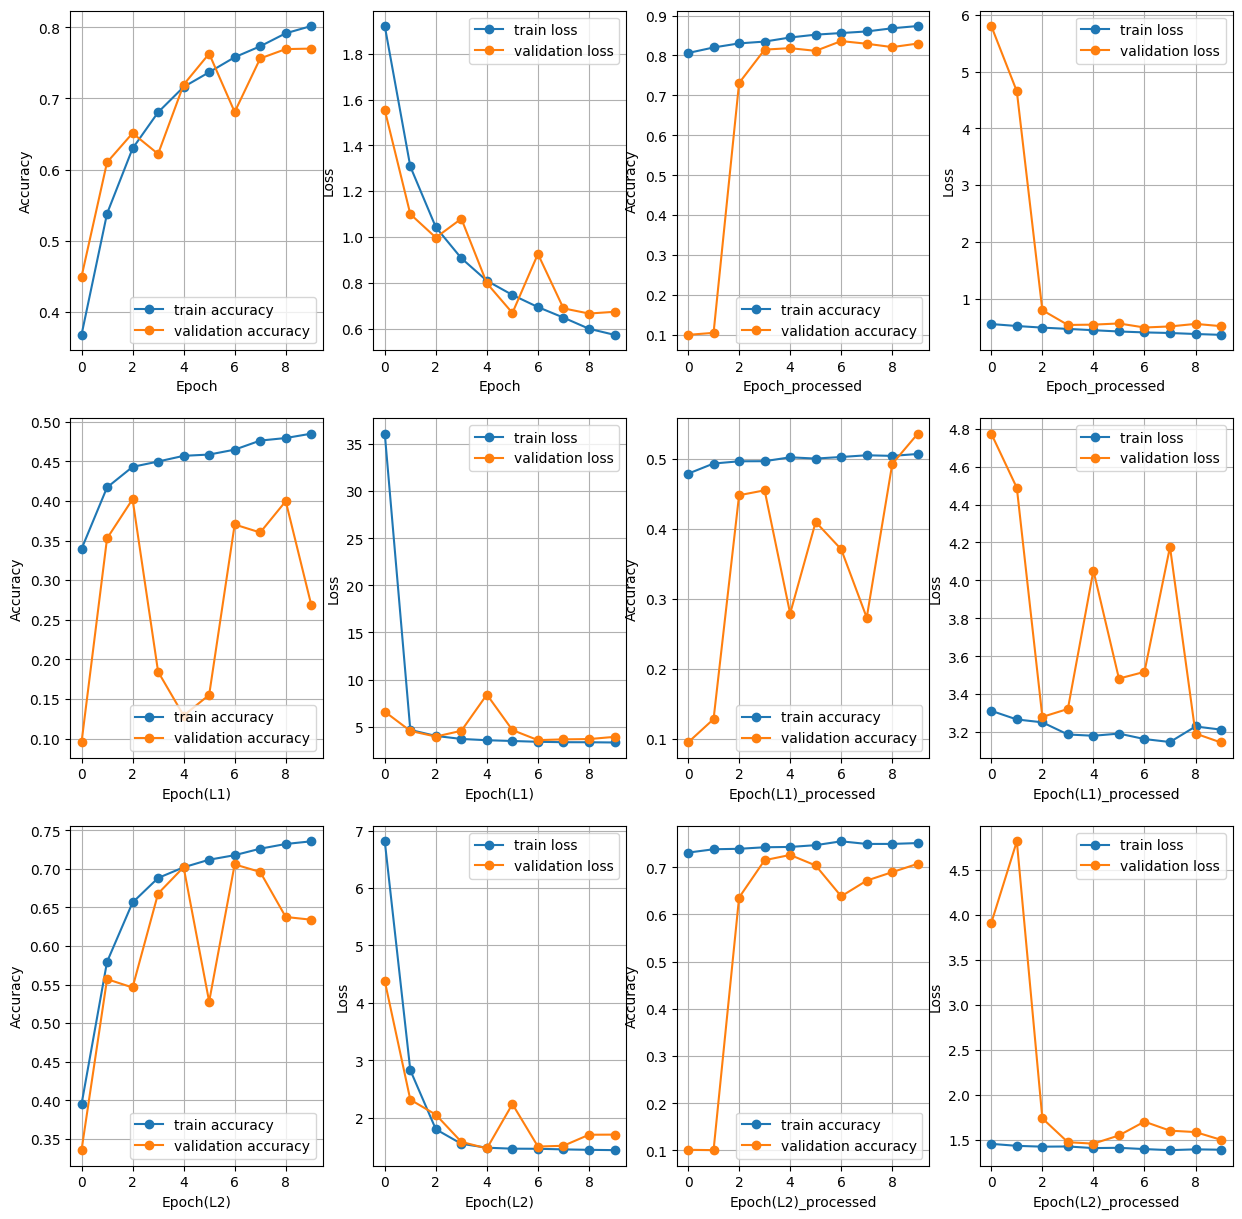

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,3)
plt.plot(h_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,4)
plt.plot(h_processed.history['loss'], 'o-', label='train loss')
plt.plot(h_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,5)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,6)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,7)
plt.plot(h1_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,8)
plt.plot(h1_processed.history['loss'], 'o-', label='train loss')
plt.plot(h1_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,9)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,10)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,11)
plt.plot(h2_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,12)
plt.plot(h2_processed.history['loss'], 'o-', label='train loss')
plt.plot(h2_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_acc, test_loss = model.evaluate(X_test, Y_test)
test_acc_processed, test_loss_processed = model_processed.evaluate(X_test_processed, Y_test)
test_acc_l1, test_loss_l1 = model_l1.evaluate(X_test, Y_test)
test_acc_l1_processed, test_loss_l1_processed = model_l1_processed.evaluate(X_test_processed, Y_test)
test_acc_l2, test_loss_l2 = model_l2.evaluate(X_test, Y_test)
test_acc_l2_processed, test_loss_l2_processed = model_l2_processed.evaluate(X_test_processed, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5104 - accuracy: 0.6985


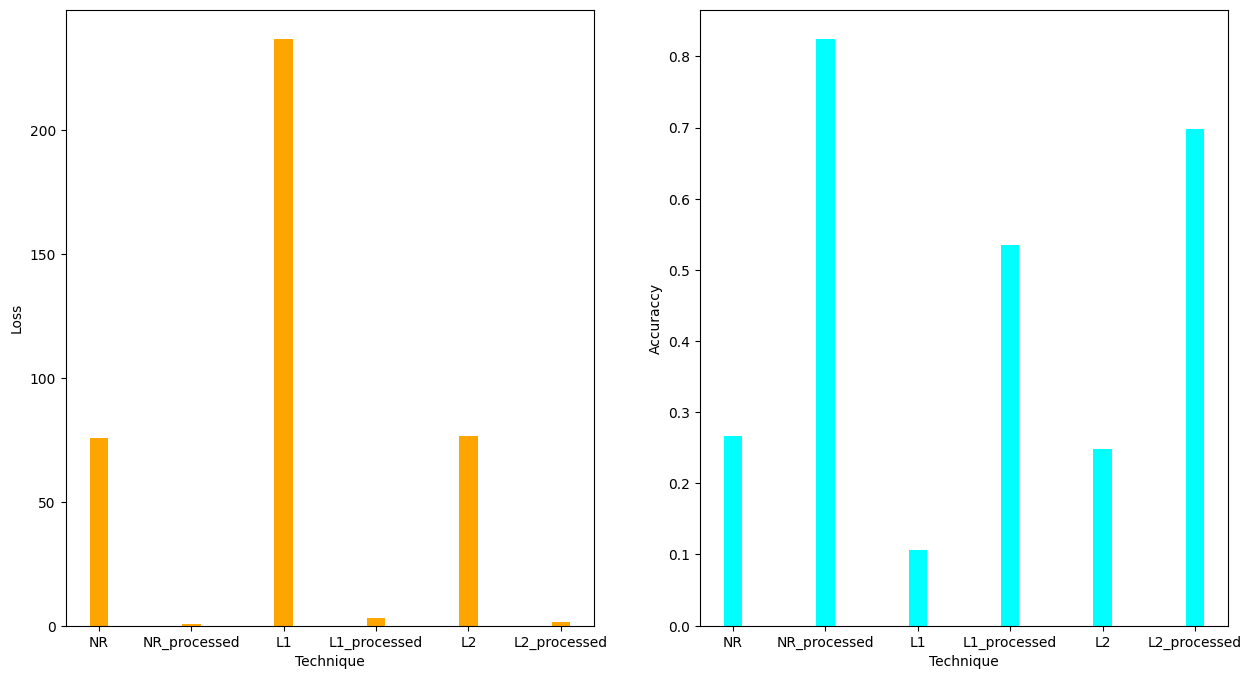

In [22]:
plt.figure(figsize=(15,8))

x = np.arange(6)
y1 = [test_loss, test_loss_processed, test_loss_l1, test_loss_l1_processed, test_loss_l2, test_loss_l2_processed]
y2 = [test_acc, test_acc_processed, test_acc_l1, test_acc_l1_processed, test_acc_l2, test_acc_l2_processed]
width = 0.2

# plot data in grouped manner of bar type
plt.subplot(1,2,1)
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Loss")

# plot data in grouped manner of bar type
plt.subplot(1,2,2)
plt.bar(x, y1, width, color='cyan')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Accuraccy")
plt.show()